# Exploring vaccines

In [1]:
import pandas as pd
import numpy as np
from icecream import ic
import datetime

In [12]:
def read_data(data_prefix):
    filename = "../" + data_prefix + "_final.csv"
    df = pd.read_csv(filename)
    df = df.sort_values("created_at") 
    ic(data_prefix)
    ic(len(df))
    df["date"] = pd.to_datetime(df["date"])
    
    df = df.loc[(df["date"] >= "2021-01-01")]
    ic(len(df))
    
    df["Keyword"] = data_prefix.capitalize()
        
    ic(df["nr_of_tweets"].mean())
    ic(df["nr_of_tweets"].std())
    ic(df["nr_of_tweets"].median())
    
    return df

In [13]:
va_prefix = "vaccin"
va = read_data(va_prefix)
#va["smooth_compound"] = gaussian_kernel(va["centered_compound"], sigma = 1, fwhm = 2000)

az_prefix = "astrazeneca"
az = read_data(az_prefix)
#az["smooth_compound"] = gaussian_kernel(az["centered_compound"], sigma = 1, fwhm = 50)

pf_prefix = "pfizer"
pf = read_data(pf_prefix)
#pf["smooth_compound"] = gaussian_kernel(pf["centered_compound"], sigma = 1, fwhm = 50)

mo_prefix = "moderna"
mo = read_data(mo_prefix)
#mo["smooth_compound"] = gaussian_kernel(mo["centered_compound"], sigma = 1, fwhm = 50)

jj_prefix = "j&j"
jj = read_data(jj_prefix)
#jj["smooth_compound"] = gaussian_kernel(jj["centered_compound"], sigma = 1, fwhm = 50)

cp_prefix = "coronapas"
cp = read_data(cp_prefix)

ic| data_prefix: 'vaccin'
ic| len(df): 124410
ic| len(df): 91954
ic| df["nr_of_tweets"].mean(): 688.369771842443
ic| df["nr_of_tweets"].std(): 424.69447417920765
ic| df["nr_of_tweets"].median(): 580.0
ic| data_prefix: 'astrazeneca'
ic| len(df): 3717
ic| len(df): 3717
ic| df["nr_of_tweets"].mean(): 86.27845036319613
ic| df["nr_of_tweets"].std(): 101.76927672226633
ic| df["nr_of_tweets"].median(): 44.0
ic| data_prefix: 'pfizer'
ic| len(df): 5081
ic| len(df): 5081
ic| df["nr_of_tweets"].mean(): 43.92895099389884
ic| df["nr_of_tweets"].std(): 33.297387495675466
ic| df["nr_of_tweets"].median(): 34.0
ic| data_prefix: 'moderna'
ic| len(df): 2028
ic| len(df): 2028
ic| df["nr_of_tweets"].mean(): 21.3767258382643
ic| df["nr_of_tweets"].std(): 17.858184166275382
ic| df["nr_of_tweets"].median(): 15.0
ic| data_prefix: 'j&j'
ic| len(df): 3452
ic| len(df): 3452
ic| df["nr_of_tweets"].mean(): 97.27172653534183
ic| df["nr_of_tweets"].std(): 105.51616602458014
ic| df["nr_of_tweets"].median(): 53.0
ic| d

In [14]:
joint = pd.concat([va, az, pf, mo, jj]).drop_duplicates().reset_index(drop=True)

In [15]:
#joint.to_csv("joint_with_smooth.csv", index=False)
#joint = pd.read_csv("joint_with_smooth.csv")
joint["date"] = pd.to_datetime(joint["date"])

In [16]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

In [17]:
dates = ["2021-01-06", "2021-01-29",
        "2021-03-11", "2021-03-25", "2021-04-14"]

labels = ["Moderna approved", "AstraZeneca (AZ) approved",
         "AZ halted", "AZ further halted", "AZ withdrawn"]

dates_df = va[va["date"].isin(dates)]

dates_df = dates_df.groupby("date").mean().reset_index()
dates_df["labels"] = labels
dates_df["date"] = pd.to_datetime(dates_df["date"])
dates_df["date1"] = pd.DatetimeIndex(dates_df.date) + pd.DateOffset(1)

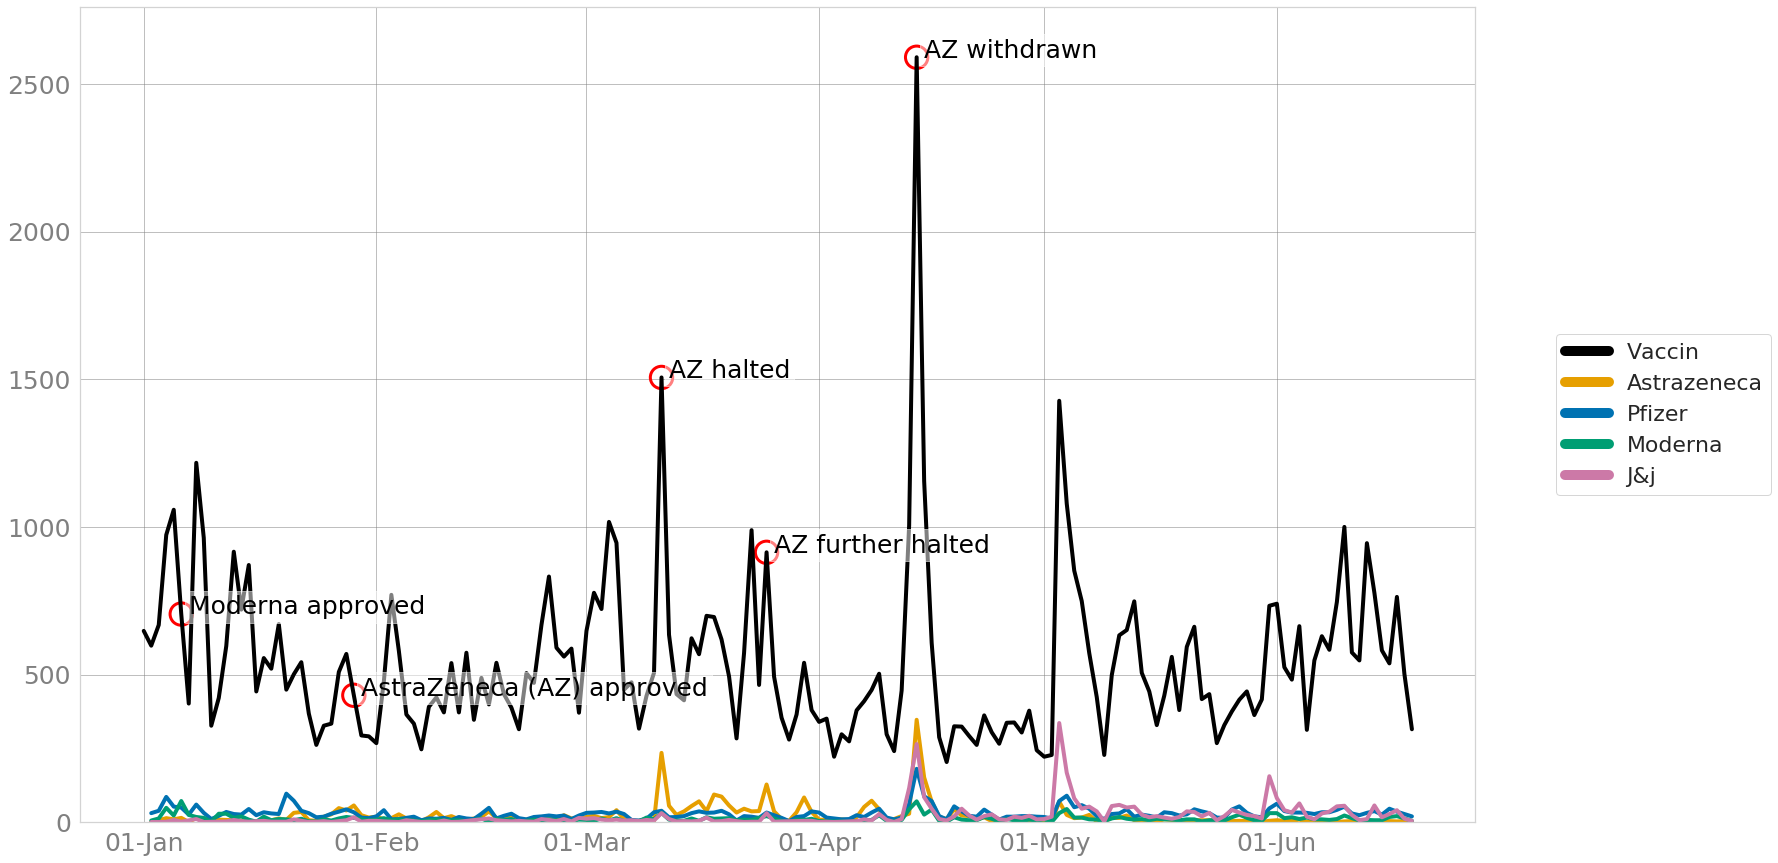

In [18]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#           0 black  1 da orange 2 li blue  3  green     4 li orange 5 da blue  orange  7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

palette = ["#000000", "#E69F00", "#0072B2", "#009E73", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

xscale = "date"
yscale = "nr_of_tweets"

ax1 = sns.lineplot(x=xscale, y=yscale, hue="Keyword",
                  palette = palette, 
                   #label = df_prefix,
                     linewidth = 4, data = joint)

x_coordinates = dates_df["date"]
y_coordinates = dates_df["nr_of_tweets"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(dates_df.shape[0]):
    plt.text(x = dates_df.date1[i], y = dates_df.nr_of_tweets[i]+0.007,
             s = dates_df.labels[i],
             fontdict = dict(color=palette[0],size=25),
             bbox = dict(facecolor="white",alpha=0.5))

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax1.set(ylim=(0, None))


leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plot_name = "example_vaccine_mentions_over_time.png"
fig.savefig(plot_name, bbox_inches='tight')

fig.show()

In [19]:
dates = ["2021-01-06", "2021-01-29",
        "2021-03-11", "2021-03-25", "2021-04-14"]

labels = ["Moderna approved", "AstraZeneca (AZ) approved",
         "AZ halted", "AZ further halted", "AZ withdrawn"]

dates_df = az[az["date"].isin(dates)]

dates_df = dates_df.groupby("date").mean().reset_index()
dates_df["labels"] = labels
dates_df["date"] = pd.to_datetime(dates_df["date"])
dates_df["date1"] = pd.DatetimeIndex(dates_df.date) + pd.DateOffset(1)

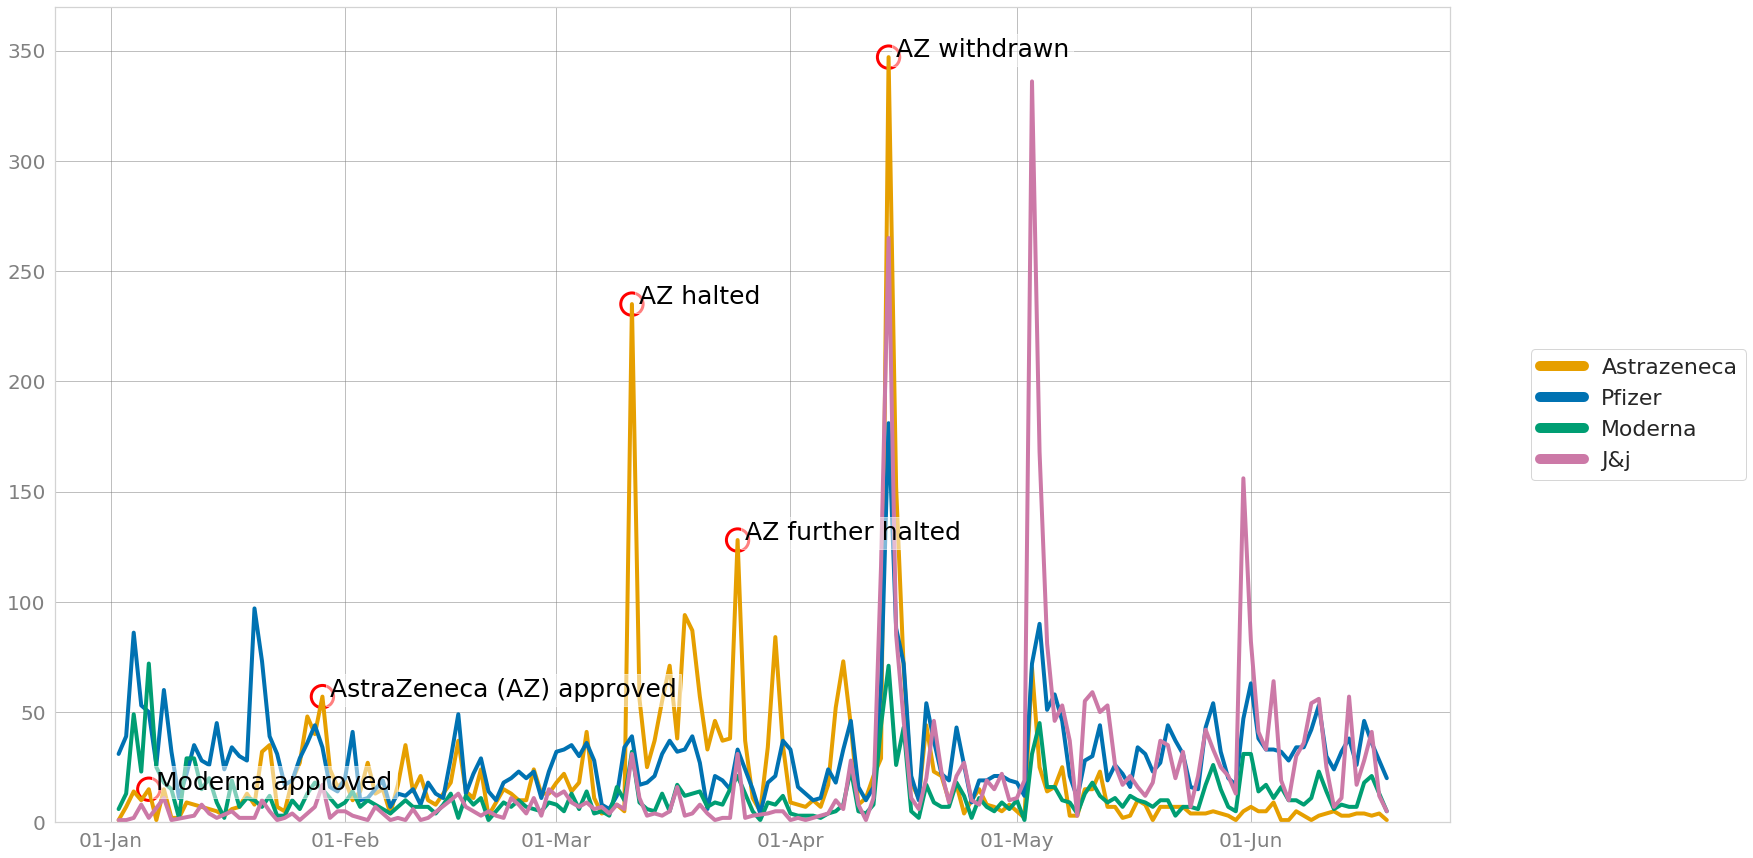

In [20]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

palette = ["#E69F00", "#0072B2", "#009E73", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale, hue="Keyword",
                  palette = palette, 
                   #label = df_prefix,
                     linewidth = 4, data = joint[joint["Keyword"] != "Vaccin"])

x_coordinates = dates_df["date"]
y_coordinates = dates_df["nr_of_tweets"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(dates_df.shape[0]):
    plt.text(x = dates_df.date1[i], y = dates_df.nr_of_tweets[i]+0.007,
             s = dates_df.labels[i],
             fontdict = dict(color="black",size=25),
             bbox = dict(facecolor="white",alpha=0.5))

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax1.set(ylim=(0, None))

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

#title = "Mentions of '" + data_prefix + "'"
#fig.suptitle(title, size = "40")

#plot_name = "fig/all_vaccin_mentions.png"
#fig.savefig(plot_name)

fig.show()

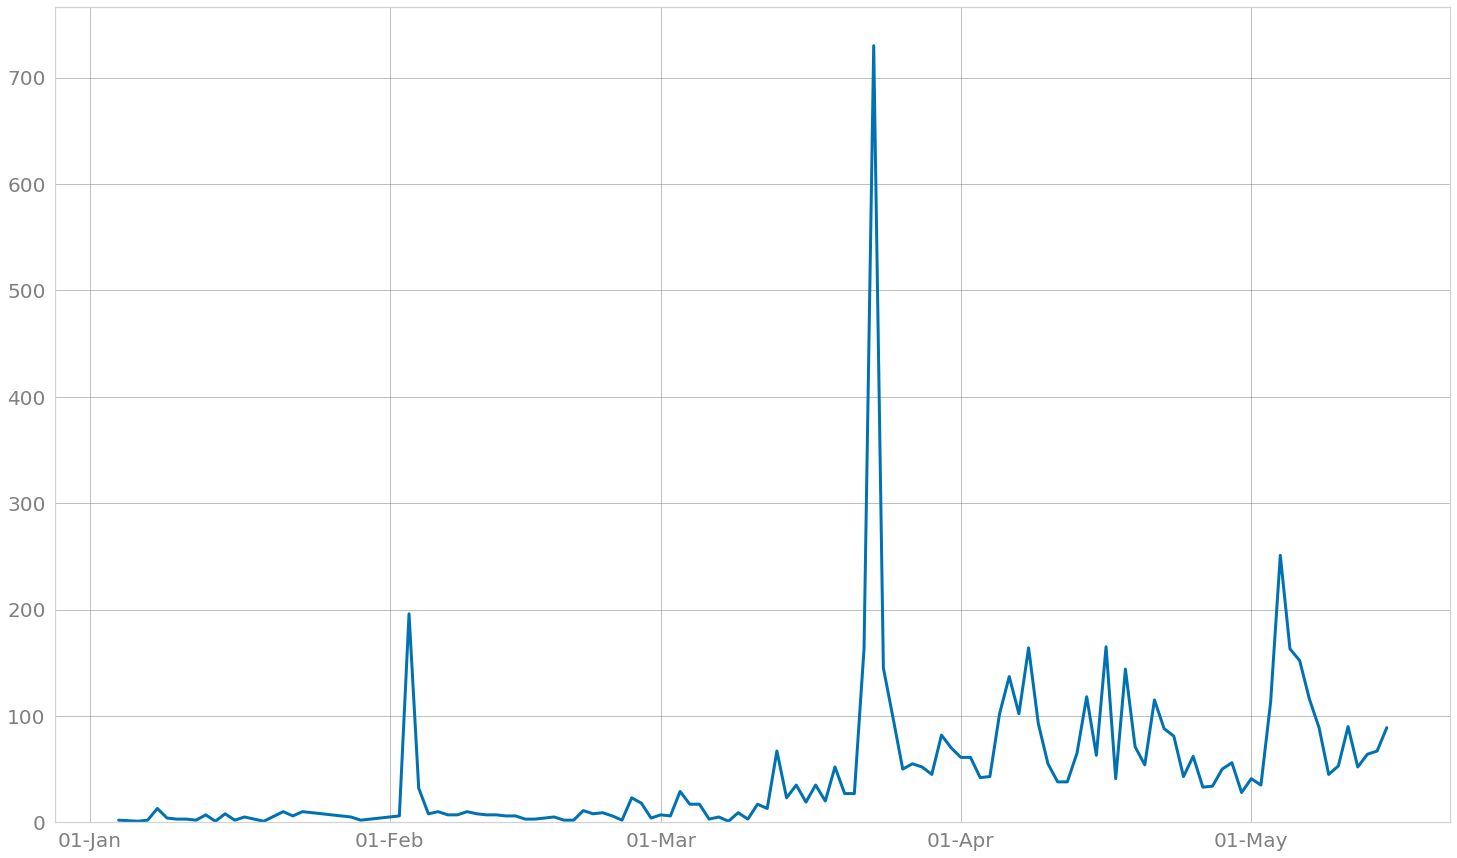

In [53]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x=xscale, y=yscale,
                  color = palette[5], 
                   #label = cp_prefix,
                     linewidth = 3, data = cp )

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax1.set(ylim=(0, None))
#title = "Mentions of '" + data_prefix + "'"
#fig.suptitle(title, size = "40")

#plot_name = "fig/all_vaccin_mentions.png"
#fig.savefig(plot_name)

fig.show()

In [9]:
cp.sort_values("nr_of_tweets").tail()

,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,neu,pos,compound,centered_compound,7_cent_comp,30_cent_comp,nr_of_tweets,Keyword
1610,1771,2021-03-23 13:07:11,1.374347e+18,@ninapalesabonde @playtechdk @PaulaLarrain1 1/...,['coronapas'],2021-03-23,1/ Nok at vi åbnede op mere liberalt som si...,1/ Nok at vi åbnede op mere liberalt som si...,False,0.113,0.781,0.106,-0.0917,-0.165902,0.103555,-0.005052,730,Coronapas
1609,1770,2021-03-23 13:07:01,1.374347e+18,Coronapasset vil betyde endnu mere butiksdød. ...,['coronapas'],2021-03-23,Coronapasset vil betyde endnu mere butiksdød. ...,Coronapasset vil betyde endnu mere butiksdød. ...,False,0.000,0.562,0.438,0.6875,0.613298,0.067841,-0.000766,730,Coronapas
1608,1769,2021-03-23 13:03:45,1.374346e+18,Når revisoren skal til frisøren skal han vise ...,['coronapas'],2021-03-23,Når revisoren skal til frisøren skal han vise ...,Når revisoren skal til frisøren skal han vise ...,False,0.000,1.000,0.000,0.0000,-0.074202,0.057026,-0.005592,730,Coronapas
1615,1776,2021-03-23 13:26:07,1.374352e+18,"Men har politikerne tænkt på, at et coronapas ...",['coronapas'],2021-03-23,"Men har politikerne tænkt på, at et coronapas ...","Men har politikerne tænkt på, at et coronapas ...",False,0.000,1.000,0.000,0.0000,-0.074202,-0.068702,-0.042959,730,Coronapas
1527,1688,2021-03-23 10:49:34,1.374312e+18,"#coronapas Undskyld, men jeg forstår ikke hvor...",['coronapas'],2021-03-23,"Undskyld, men jeg forstår ikke hvorfor der sk...","Undskyld, men jeg forstår ikke hvorfor der sk...",False,0.081,0.919,0.000,-0.2369,-0.311102,-0.185074,-0.107182,730,Coronapas


# Quick sentiment analysis

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


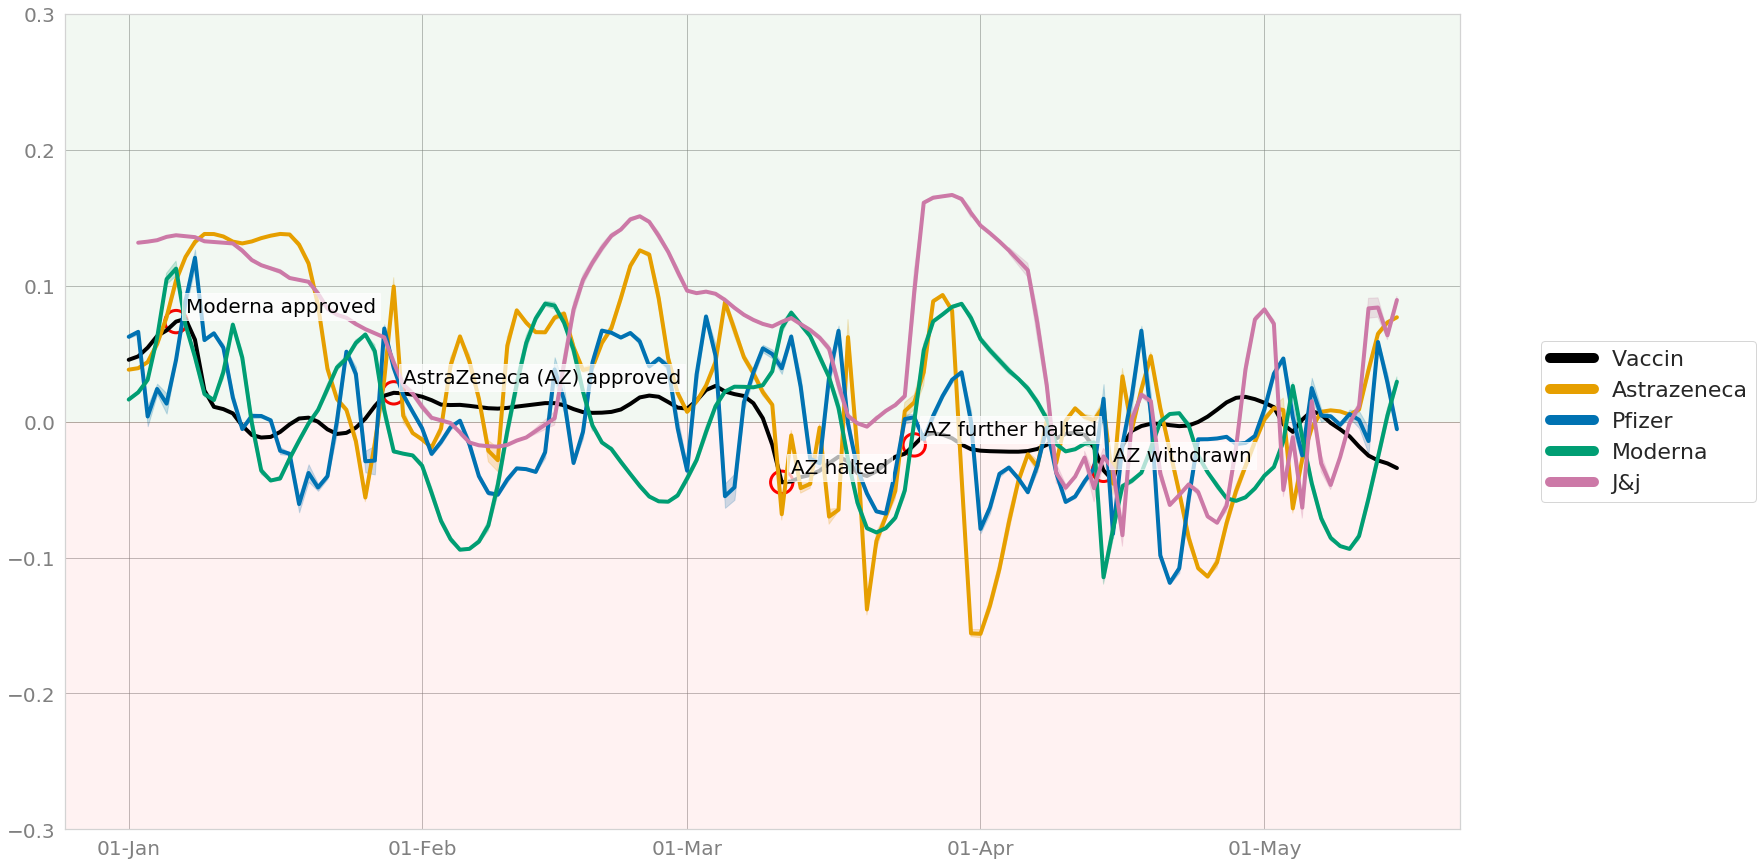

In [96]:
xscale = "date"
yscale = "smooth_compound"

min_ylim = -0.3
max_ylim = 0.3

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

palette = ["#000000", "#E69F00", "#0072B2", "#009E73", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale, hue="Keyword",
                  palette = palette, 
                     linewidth = 4, data = joint)

x_coordinates = dates_df["date"]
y_coordinates = dates_df["smooth_compound"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(dates_df.shape[0]):
    plt.text(x = dates_df.date1[i], y = dates_df["smooth_compound"][i]+0.007,
             s = dates_df.labels[i],
             fontdict = dict(color="black",size=20),
             bbox = dict(facecolor="white",alpha=0.7))

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.1', alpha=0.05)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.', alpha=0.05)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)


fig.show()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


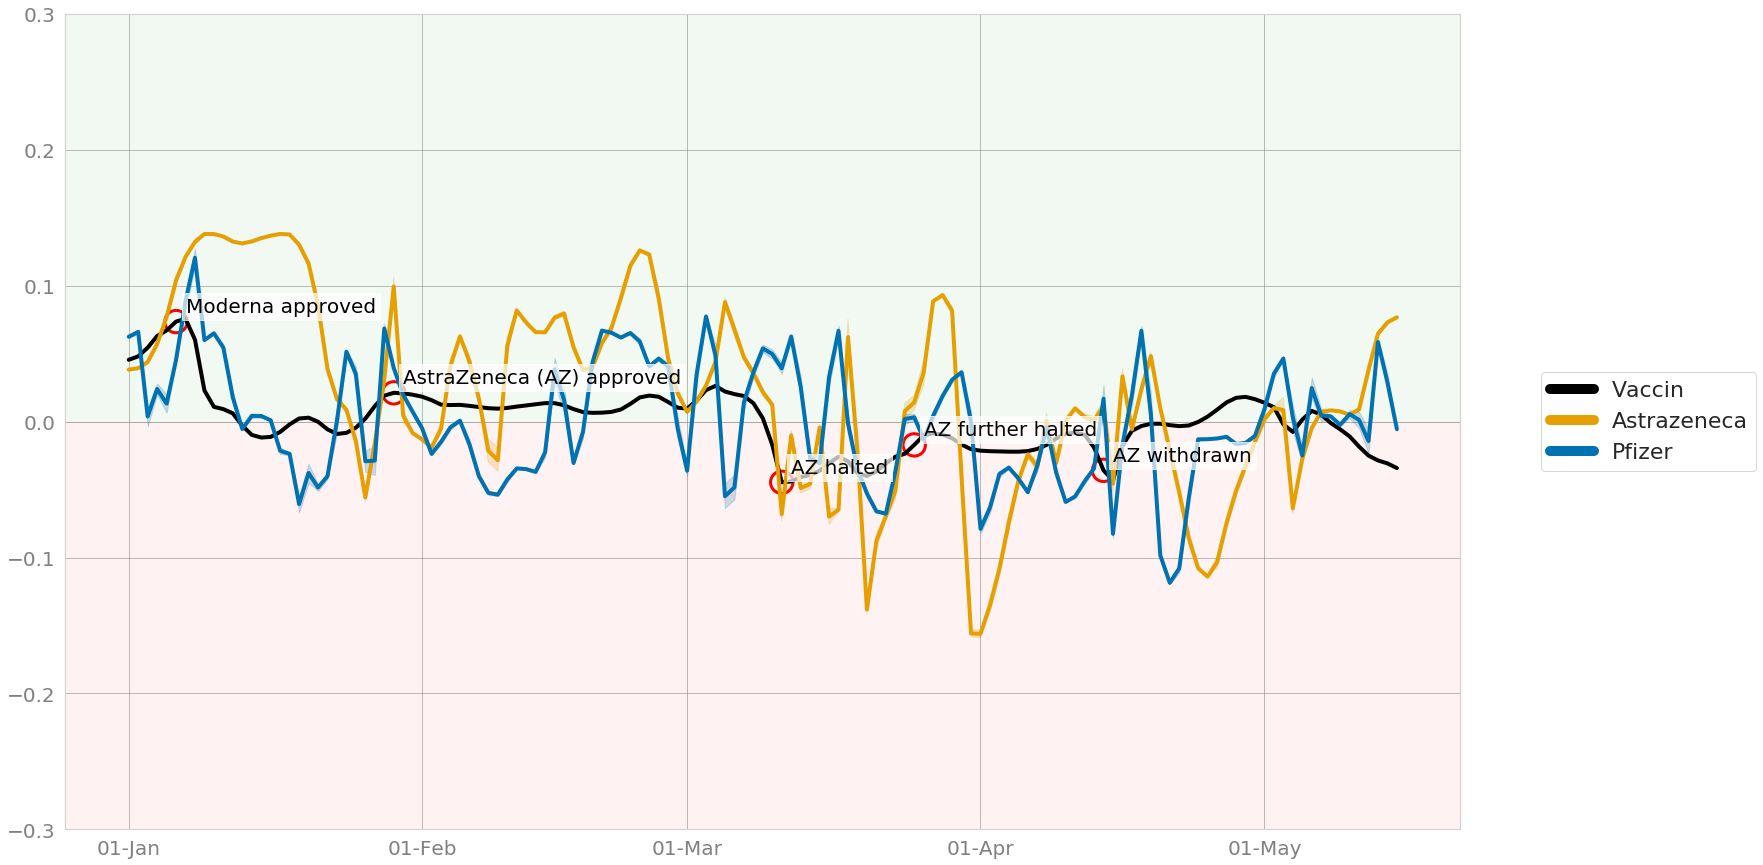

In [95]:
xscale = "date"
yscale = "smooth_compound"

min_ylim = -0.3
max_ylim = 0.3

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

palette = ["#000000", "#E69F00", "#0072B2", "#009E73", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale, hue="Keyword",
                  palette = palette[0:3], 
                     linewidth = 4, data = joint[joint["Keyword"].isin(["Vaccin", "Astrazeneca", "Pfizer"])])

x_coordinates = dates_df["date"]
y_coordinates = dates_df["smooth_compound"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(dates_df.shape[0]):
    plt.text(x = dates_df.date1[i], y = dates_df["smooth_compound"][i]+0.007,
             s = dates_df.labels[i],
             fontdict = dict(color="black",size=20),
             bbox = dict(facecolor="white",alpha=0.7))

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.1', alpha=0.05)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.', alpha=0.05)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)


fig.show()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


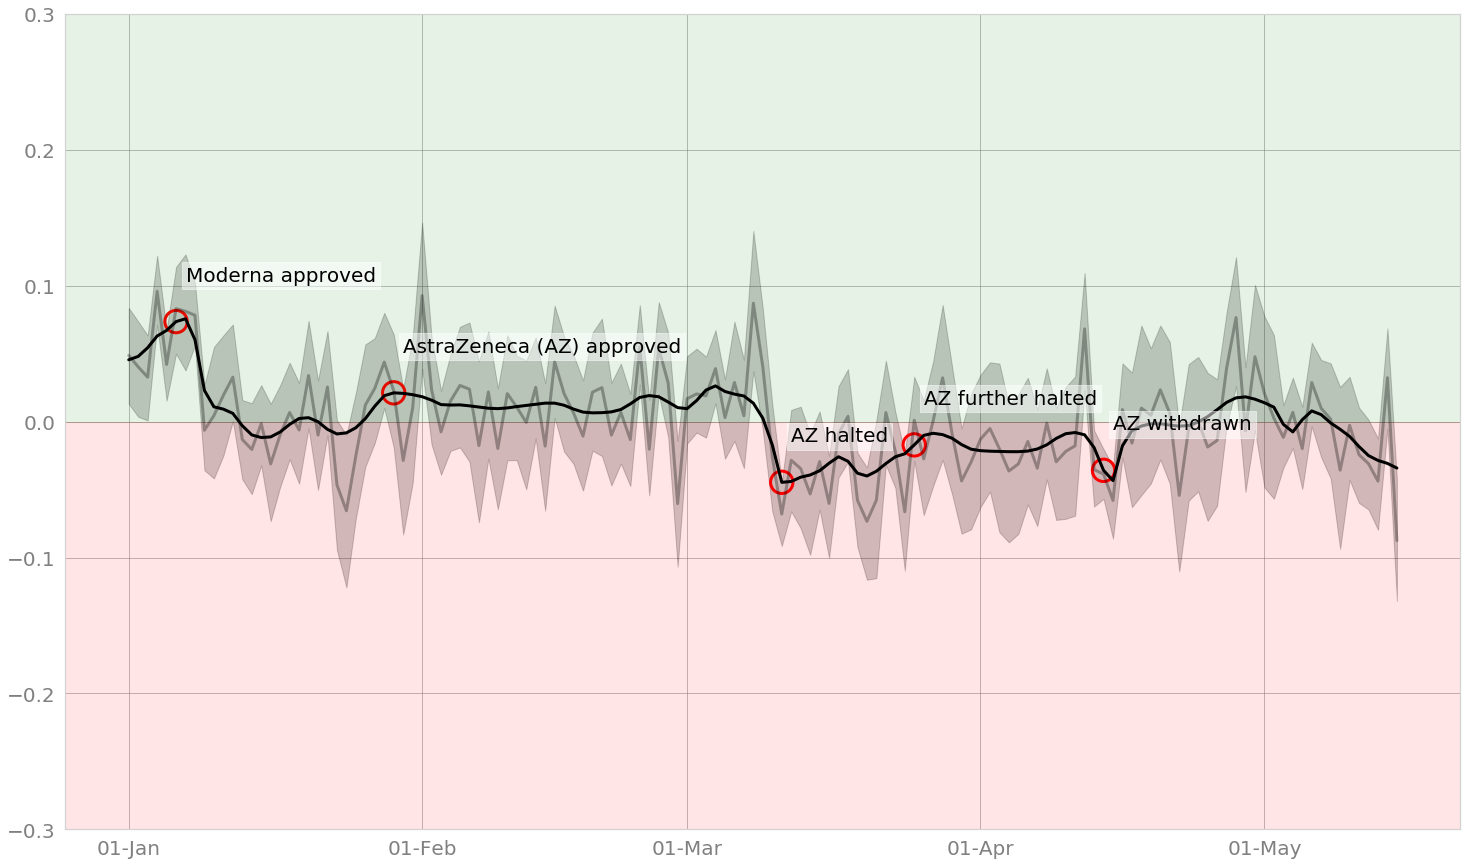

In [92]:
data = va

#           va          az          pf
palette = ["#000000", "#E69F00", "#56B4E9"]
color = palette[0]

min_ylim = -0.3
max_ylim = 0.3

xscale = "date"
yscale = "smooth_compound"


#######################################################

dates_df = data[data["date"].isin(dates)]

dates_df = dates_df.groupby("date").mean().reset_index()
dates_df["labels"] = labels
dates_df["date"] = pd.to_datetime(dates_df["date"])
dates_df["date1"] = pd.DatetimeIndex(dates_df.date) + pd.DateOffset(1)


matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

yscale2 = "centered_compound"

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale,
                   color = color,
                   #alpha = 0.30,
                     linewidth = 3, data = data)

ax1 = sns.lineplot(x=xscale, y=yscale2, 
                   color = color,
                   alpha = 0.30,
                     linewidth = 3, data = data)

x_coordinates = dates_df["date"]
y_coordinates = dates_df["smooth_compound"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(dates_df.shape[0]):
    plt.text(x = dates_df.date1[i], y = dates_df["smooth_compound"][i]+0.030,#0.007
             s = dates_df.labels[i],
             fontdict = dict(color="black",size=20),
             bbox = dict(facecolor="white",alpha=0.5))

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.2', alpha=0.1)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))


fig.show()

In [70]:
min_ylim = -1
max_ylim = 1

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


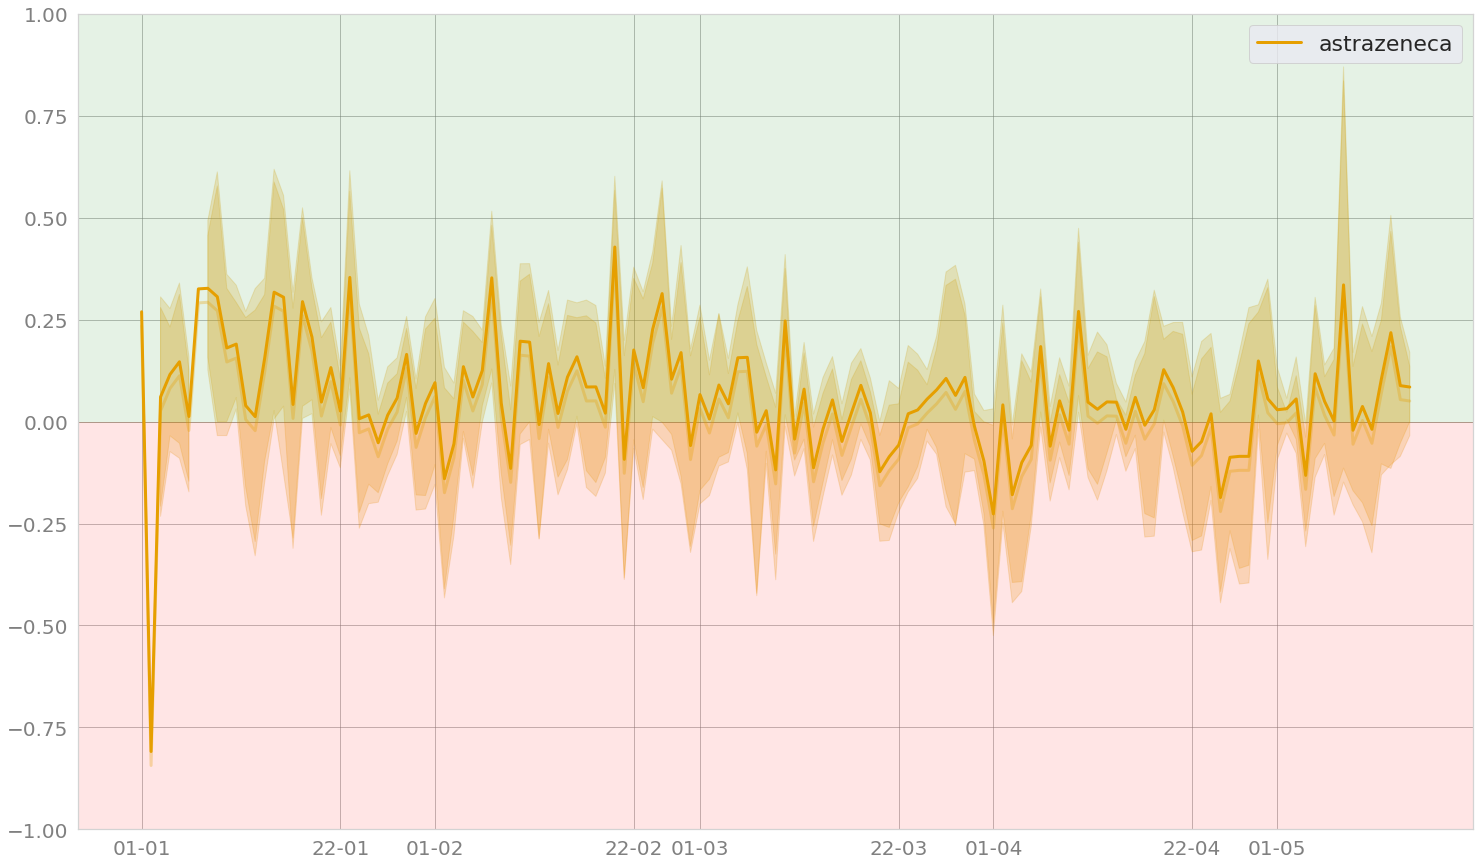

In [71]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale,
                   label = az_prefix, 
                   color = palette[1],
                   #alpha = 0.30,
                     linewidth = 3, data = az)

ax1 = sns.lineplot(x=xscale, y=yscale2, 
                   color = palette[1],
                   alpha = 0.30,
                     linewidth = 3, data = az)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.2', alpha=0.1)


#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

#plot_name = "fig/sentiment_compound_winter.png"
#ig.savefig(plot_name)

fig.show()

In [ ]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale,
                   label = pf_prefix, 
                   color = palette[2],
                   #alpha = 0.30,
                     linewidth = 3, data = pf)

ax1 = sns.lineplot(x=xscale, y=yscale2, 
                   color = palette[2],
                   alpha = 0.30,
                     linewidth = 3, data = pf)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.2', alpha=0.1)


#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

#plot_name = "fig/sentiment_compound_winter.png"
#ig.savefig(plot_name)

fig.show()

In [ ]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale,
                   label = mo_prefix, 
                   color = palette[3],
                   #alpha = 0.30,
                     linewidth = 3, data = mo)

ax1 = sns.lineplot(x=xscale, y=yscale2, 
                   color = palette[3],
                   alpha = 0.30,
                     linewidth = 3, data = mo)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.2', alpha=0.1)


#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

#plot_name = "fig/sentiment_compound_winter.png"
#ig.savefig(plot_name)

fig.show()

In [ ]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale,
                   label = jj_prefix, 
                   color = palette[5],
                   #alpha = 0.30,
                     linewidth = 3, data = jj)

ax1 = sns.lineplot(x=xscale, y=yscale2, 
                   color = palette[5],
                   alpha = 0.30,
                     linewidth = 3, data = jj)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.2', alpha=0.1)


#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

#plot_name = "fig/sentiment_compound_winter.png"
#ig.savefig(plot_name)

fig.show()

In [ ]:
min_ylim = -1
max_ylim = 1

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x=xscale, y=yscale,
                   label = cp_prefix, 
                   color = palette[5],
                   #alpha = 0.30,
                     linewidth = 3, data = cp)

ax1 = sns.lineplot(x=xscale, y=yscale2, 
                   color = palette[5],
                   alpha = 0.30,
                     linewidth = 3, data = cp)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
plt.axhspan(0, max_ylim, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, min_ylim, color = "red", facecolor='0.2', alpha=0.1)


#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(min_ylim, max_ylim))

#plot_name = "fig/sentiment_compound_winter.png"
#ig.savefig(plot_name)

fig.show()

# Ngrams

In [75]:
import spacy
import string
from string import digits
import re
sp = spacy.load('da_core_news_lg')

file = open("../src/stop_words.txt","r+")
stop_words = file.read().split()

# Lemmatize stop words
stops = " ".join(stop_words)
stops = sp(stops)
my_stop_words = [t.lemma_ for t in stops]

In [76]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def lemmas(row):
    tweet = row["mentioneless_text"].lower()
    tweet = remove_emoji(tweet)
    tweet = re.sub(r'@(\S*)\w', '', tweet) #mentions
    tweet = re.sub(r'#\S*\w', '', tweet) # hashtags
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    tweet = re.sub(url_pattern, '', tweet)
    
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #tweet = tweet.translate(str.maketrans('', '', digits))
    tweet = tweet.replace('”', '')
    tweet = tweet.replace('“', '')
    
    sentence = sp(tweet)
    lemmas = []
    for word in sentence:
        lemmas.append(word.lemma_)
    res = [x for x in lemmas if x not in my_stop_words]
    hmm = ['   ','  ',' ','','♂','','❤','','🤷', '"', "'"]
    res = [x for x in res if x not in hmm]
    return res

In [ ]:
#joint["tokens_list"] = joint.apply(lambda row: lemmas(row), axis = 1)

In [123]:
#joint.to_csv("joint_with_tokens.csv", index=False)

joint = pd.read_csv("joint_with_tokens.csv",converters={"tokens_list": lambda x: x.strip("[]").split(", ")})

#x = [''.join(c for c in s if c not in string.punctuation) for s in x]

joint["tokens_list"] = joint.apply(lambda x: [''.join(c for c in s if c not in string.punctuation) for s in x["tokens_list"]], axis = 1)

In [124]:
joint["tokens_list"][0]

['røre',
 'villa',
 'villakulla',
 'mormor',
 '’',
 's',
 'valby',
 'holde',
 'holde',
 'faste',
 'intil',
 'vaccine',
 'give',
 'vinge',
 'tid',
 'tænke',
 'ske',
 'familie',
 'tage',
 'sidste',
 'mile',
 'lockdown',
 'ipad',
 'eventyr',
 'savne',
 '5',
 'barnebarn']

In [165]:
cp["tokens_list"] = cp.apply(lambda row: lemmas(row), axis = 1)

In [126]:
from nltk import bigrams
import itertools
import collections
import networkx as nx
import spacy
import nltk

In [127]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [128]:
def prep_bigrams(data, data_prefix):
    freq_df = data[data["Keyword"] == data_prefix.capitalize()]
    terms_bigram = [list(bigrams(tweet)) for tweet in freq_df['tokens_list']]
    bigram_list = list(itertools.chain(*terms_bigram))
    bigram_counts = collections.Counter(bigram_list)
    bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])
    return bigram_df

In [166]:
vab = prep_bigrams(joint, va_prefix)
azb = prep_bigrams(joint, az_prefix)
pfb = prep_bigrams(joint, pf_prefix)
mob = prep_bigrams(joint, mo_prefix)
jjb = prep_bigrams(joint, jj_prefix)
cpb = prep_bigrams(cp, cp_prefix)

In [167]:
bigram_df = cpb

In [168]:
bigram_df

,bigram,count
0,"(krav, coronapas)",134
1,"(digital, coronapas)",130
2,"(vise, coronapas)",118
3,"(give, mening)",97
4,"(kræve, coronapas)",93
5,"(negativ, test)",88
6,"(bruge, coronapas)",80
7,"(gyldig, coronapas)",78
8,"(sidste, år)",73
9,"(indføre, coronapas)",68


In [160]:
bigram_df = bigram_df.drop([26]).reset_index(drop=True)

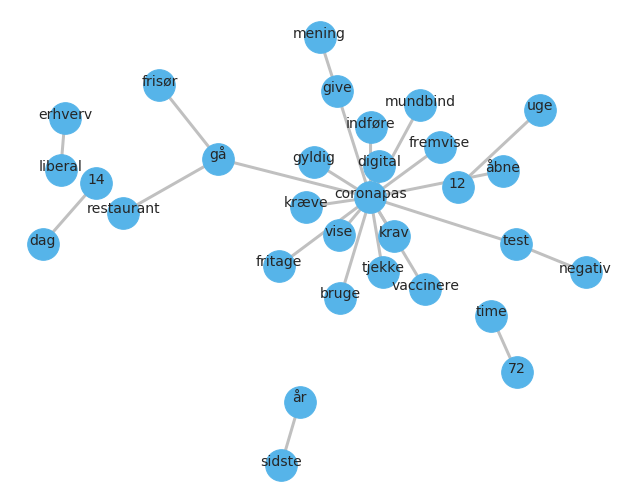

In [169]:
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=3)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color= "silver",
                 node_color= palette[2],
                 node_size = 1000,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor= palette[2],
            #          alpha= 0.10),
            horizontalalignment='center', fontsize=14)
    

fig.patch.set_visible(False)
ax.axis('off')

#plt.savefig("fig/bigram_graph.png", dpi=150)

plt.show()